<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откройте-файлы-и-изучите-их." data-toc-modified-id="Откройте-файлы-и-изучите-их.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откройте файлы и изучите их.</a></span></li><li><span><a href="#Проверьте,-что-эффективность-обогащения-рассчитана-правильно." data-toc-modified-id="Проверьте,-что-эффективность-обогащения-рассчитана-правильно.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверьте, что эффективность обогащения рассчитана правильно.</a></span></li><li><span><a href="#Проанализируйте-признаки,-недоступные-в-тестовой-выборке." data-toc-modified-id="Проанализируйте-признаки,-недоступные-в-тестовой-выборке.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проанализируйте признаки, недоступные в тестовой выборке.</a></span></li><li><span><a href="#Проведите-предобработку-данных." data-toc-modified-id="Проведите-предобработку-данных.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проведите предобработку данных.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравните распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуйте суммарную концентрацию всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишите-функцию-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Напишите-функцию-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишите функцию для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке." data-toc-modified-id="Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Подготовка данных

### Откройте файлы и изучите их.

In [2]:
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')

data_full.info()
data_test.info()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

### Проверьте, что эффективность обогащения рассчитана правильно. 

In [3]:
y_train = data_train['rougher.output.recovery']

c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']

y_rec = (c * (f - t)) / (f * (c - t)) * 100

rougher_mae = mean_absolute_error(y_train, y_rec)
display(y_train.describe())
display("{:.16f}".format(float(rougher_mae)))

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

'0.0000000000000097'

    MAE очень близко к 0, значит, что эффективность обогащения рассчитана правильно, отличия между табличными данными и моими рассчетами минимальны

### Проанализируйте признаки, недоступные в тестовой выборке. 

In [4]:
attribute_test = data_test.columns.to_list()
attribute_full = data_full.columns.to_list()
attribute_train = data_train.columns.to_list()
for i in attribute_test:
    attribute_full.remove(i)
print(attribute_full)

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tai

    В тестовой выборке недоступны в основном выходные параметры,в т ч целевые(final.output.concentrate_au) 
    Они относятся к количественным признакам

### Проведите предобработку данных.

In [5]:
data_train.info()
data_test.info()

# Добавил в тестовую выборку целевые признаки из full_data ['rougher.output.recovery' и 'final.output.recovery']
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery','final.output.recovery']], on='date')

# Оставил в обучающей выборке признаки такие же как и в тестовой.

other_columns=set(data_full.columns)-set(data_test.columns)
other_columns = list(other_columns)

for column in other_columns:
    data_train = data_train.drop([column], axis=1)
    
display(data_test.shape)   

# считаю сколько пропусков в каждом столбце

def empty_str(data):
    for i in data.columns:
        display(i, data[i].isna().sum())    
        

empty_str(data_train)

empty_str(data_test)   

display(data_train.isna().sum(), data_test.isna().sum())#, sep='\n')

# Чтобы не терять данные, использую метод .fillna с параметром ffill

data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

(5290, 55)

'date'

0

'final.output.recovery'

0

'primary_cleaner.input.sulfate'

20

'primary_cleaner.input.depressant'

32

'primary_cleaner.input.feed_size'

0

'primary_cleaner.input.xanthate'

100

'primary_cleaner.state.floatbank8_a_air'

4

'primary_cleaner.state.floatbank8_a_level'

1

'primary_cleaner.state.floatbank8_b_air'

4

'primary_cleaner.state.floatbank8_b_level'

1

'primary_cleaner.state.floatbank8_c_air'

2

'primary_cleaner.state.floatbank8_c_level'

1

'primary_cleaner.state.floatbank8_d_air'

3

'primary_cleaner.state.floatbank8_d_level'

1

'rougher.input.feed_ag'

0

'rougher.input.feed_pb'

100

'rougher.input.feed_rate'

8

'rougher.input.feed_size'

144

'rougher.input.feed_sol'

78

'rougher.input.feed_au'

0

'rougher.input.floatbank10_sulfate'

29

'rougher.input.floatbank10_xanthate'

8

'rougher.input.floatbank11_sulfate'

36

'rougher.input.floatbank11_xanthate'

428

'rougher.output.recovery'

0

'rougher.state.floatbank10_a_air'

1

'rougher.state.floatbank10_a_level'

1

'rougher.state.floatbank10_b_air'

1

'rougher.state.floatbank10_b_level'

1

'rougher.state.floatbank10_c_air'

1

'rougher.state.floatbank10_c_level'

1

'rougher.state.floatbank10_d_air'

0

'rougher.state.floatbank10_d_level'

0

'rougher.state.floatbank10_e_air'

436

'rougher.state.floatbank10_e_level'

0

'rougher.state.floatbank10_f_air'

0

'rougher.state.floatbank10_f_level'

0

'secondary_cleaner.state.floatbank2_a_air'

217

'secondary_cleaner.state.floatbank2_a_level'

1

'secondary_cleaner.state.floatbank2_b_air'

21

'secondary_cleaner.state.floatbank2_b_level'

1

'secondary_cleaner.state.floatbank3_a_air'

4

'secondary_cleaner.state.floatbank3_a_level'

1

'secondary_cleaner.state.floatbank3_b_air'

1

'secondary_cleaner.state.floatbank3_b_level'

1

'secondary_cleaner.state.floatbank4_a_air'

6

'secondary_cleaner.state.floatbank4_a_level'

1

'secondary_cleaner.state.floatbank4_b_air'

1

'secondary_cleaner.state.floatbank4_b_level'

1

'secondary_cleaner.state.floatbank5_a_air'

1

'secondary_cleaner.state.floatbank5_a_level'

1

'secondary_cleaner.state.floatbank5_b_air'

1

'secondary_cleaner.state.floatbank5_b_level'

1

'secondary_cleaner.state.floatbank6_a_air'

2

'secondary_cleaner.state.floatbank6_a_level'

1

'date'

0

'primary_cleaner.input.sulfate'

4

'primary_cleaner.input.depressant'

5

'primary_cleaner.input.feed_size'

0

'primary_cleaner.input.xanthate'

4

'primary_cleaner.state.floatbank8_a_air'

0

'primary_cleaner.state.floatbank8_a_level'

0

'primary_cleaner.state.floatbank8_b_air'

0

'primary_cleaner.state.floatbank8_b_level'

0

'primary_cleaner.state.floatbank8_c_air'

0

'primary_cleaner.state.floatbank8_c_level'

0

'primary_cleaner.state.floatbank8_d_air'

0

'primary_cleaner.state.floatbank8_d_level'

0

'rougher.input.feed_ag'

0

'rougher.input.feed_pb'

0

'rougher.input.feed_rate'

3

'rougher.input.feed_size'

1

'rougher.input.feed_sol'

21

'rougher.input.feed_au'

0

'rougher.input.floatbank10_sulfate'

5

'rougher.input.floatbank10_xanthate'

0

'rougher.input.floatbank11_sulfate'

8

'rougher.input.floatbank11_xanthate'

25

'rougher.state.floatbank10_a_air'

0

'rougher.state.floatbank10_a_level'

0

'rougher.state.floatbank10_b_air'

0

'rougher.state.floatbank10_b_level'

0

'rougher.state.floatbank10_c_air'

0

'rougher.state.floatbank10_c_level'

0

'rougher.state.floatbank10_d_air'

0

'rougher.state.floatbank10_d_level'

0

'rougher.state.floatbank10_e_air'

0

'rougher.state.floatbank10_e_level'

0

'rougher.state.floatbank10_f_air'

0

'rougher.state.floatbank10_f_level'

0

'secondary_cleaner.state.floatbank2_a_air'

3

'secondary_cleaner.state.floatbank2_a_level'

0

'secondary_cleaner.state.floatbank2_b_air'

2

'secondary_cleaner.state.floatbank2_b_level'

0

'secondary_cleaner.state.floatbank3_a_air'

9

'secondary_cleaner.state.floatbank3_a_level'

0

'secondary_cleaner.state.floatbank3_b_air'

0

'secondary_cleaner.state.floatbank3_b_level'

0

'secondary_cleaner.state.floatbank4_a_air'

0

'secondary_cleaner.state.floatbank4_a_level'

0

'secondary_cleaner.state.floatbank4_b_air'

0

'secondary_cleaner.state.floatbank4_b_level'

0

'secondary_cleaner.state.floatbank5_a_air'

0

'secondary_cleaner.state.floatbank5_a_level'

0

'secondary_cleaner.state.floatbank5_b_air'

0

'secondary_cleaner.state.floatbank5_b_level'

0

'secondary_cleaner.state.floatbank6_a_air'

0

'secondary_cleaner.state.floatbank6_a_level'

0

'rougher.output.recovery'

0

'final.output.recovery'

0

date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.feed_au                           0


date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [6]:
# проверяю ещё раз
display(data_train.isna().sum(), data_test.isna().sum())

date                                          0
final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate       

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

## Анализ данных

### Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

'Концентрация золота после грубой очистки: '

19.772000139486334

'Концентрация золота после первичной очистки: '

32.1194004078766

'Концентрация золота финальной очистки: '

44.076512941952664

'Концентрация cеребра после грубой очистки: '

11.994759359873452

'Концентрация cеребра после первичной очистки: '

8.442408077719056

'Концентрация cеребра финальной очистки: '

5.168470373676826

'Концентрация свинца после грубой очистки: '

7.606272313194984

'Концентрация свинца после первичной очистки: '

9.829529774200587

'Концентрация свинца финальной очистки: '

9.978894911181714

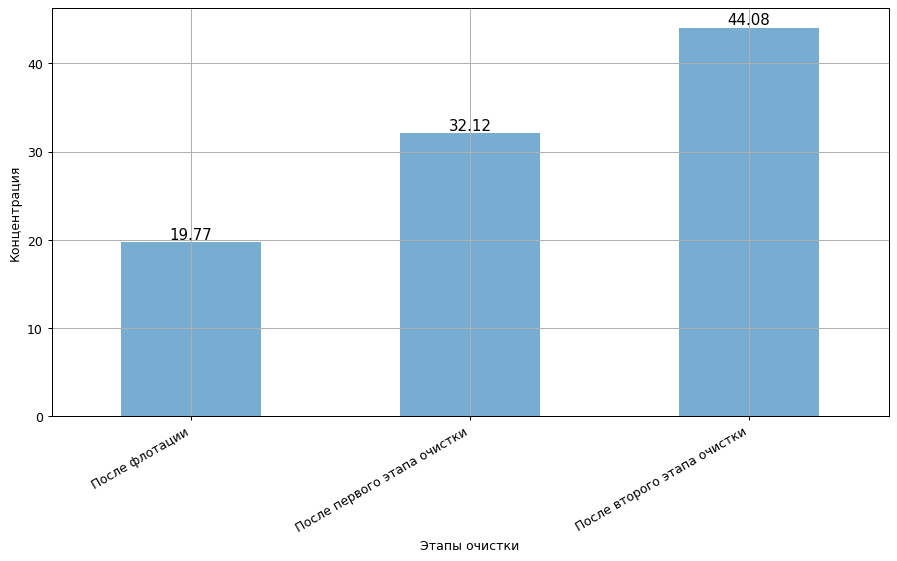

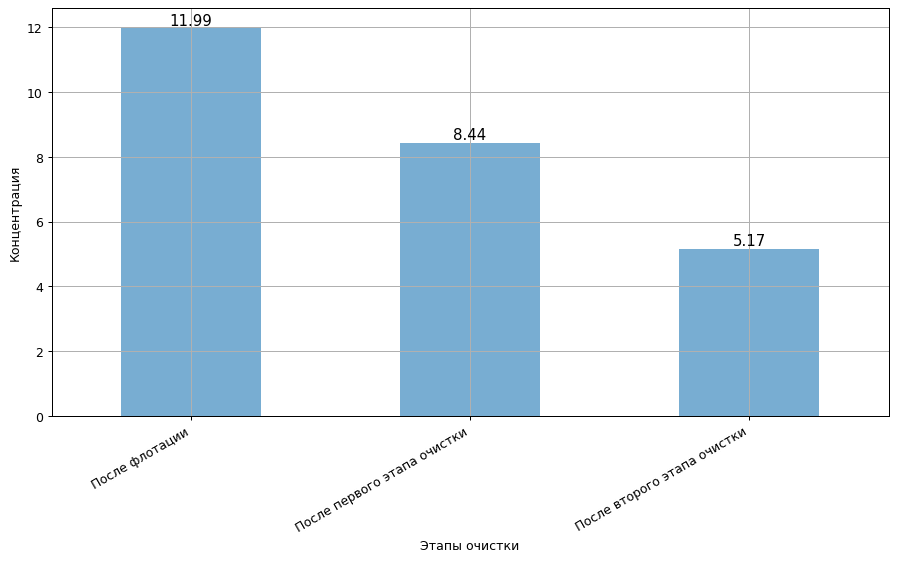

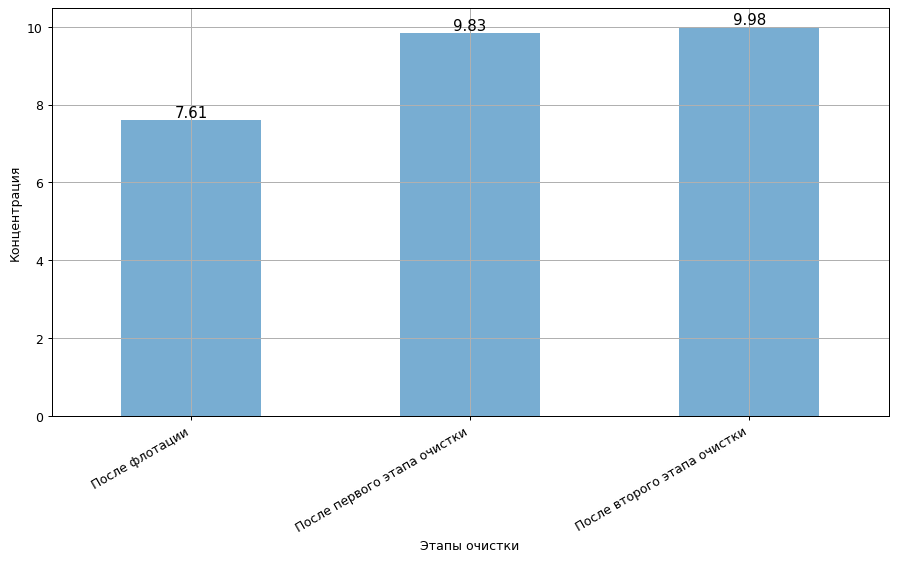

In [7]:
data_concentrate = data_full[['rougher.output.concentrate_au', 
                              'primary_cleaner.output.concentrate_au', 
                              'final.output.concentrate_au', 
                              'rougher.output.concentrate_ag', 
                              'primary_cleaner.output.concentrate_ag', 
                              'final.output.concentrate_ag', 
                              'rougher.output.concentrate_pb', 
                              'primary_cleaner.output.concentrate_pb', 
                              'final.output.concentrate_pb']]

count = 0
out = ['Концентрация {} после грубой очистки: ', 
       'Концентрация {} после первичной очистки: ', 
       'Концентрация {} финальной очистки: '
       ]
name = ['золота', 'cеребра', 'свинца']

data_concentrate_mean = np.mean(data_concentrate) # для графиков

for i, j in zip(np.mean(data_concentrate), out * 3):
    display(j.format(name[count // 3]), i)
    count += 1
    
        
n = 0
levels = ['После флотации', 'После первого этапа очистки', 'После второго этапа очистки']
for i in range(3):
    plt.figure(figsize=(12, 6), dpi= 90)
    data_concentrate_mean[n:n + 3].plot(kind = 'bar',
                                        x = [data_concentrate_mean[n], 
                                             data_concentrate_mean[n+1], 
                                             data_concentrate_mean[n+2]], 
                                        grid = True, 
                                        alpha = 0.6
                                        )
    plt.ylabel('Концентрация')
    plt.xlabel('Этапы очистки')     
    for i, val in enumerate(data_concentrate_mean[n:n + 3].values.round(2)):
        plt.text(i, 
                 val, 
                 float(val), 
                 horizontalalignment='center', 
                 verticalalignment='bottom', 
                 fontdict={'fontweight':500, 'size':12})                 
    plt.gca().set_xticklabels(levels, rotation=30, horizontalalignment= 'right')
    plt.show()
    n += 3

    Вывод: концентрация золота растет, что логично, в этом и состоит производственный процесс концентрация серебра снижается, что тоже нормально, а количество свинца увеличивается, хоть и немного(наверно), но растет


### Сравните распределения размеров гранул сырья на обучающей и тестовой выборках

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

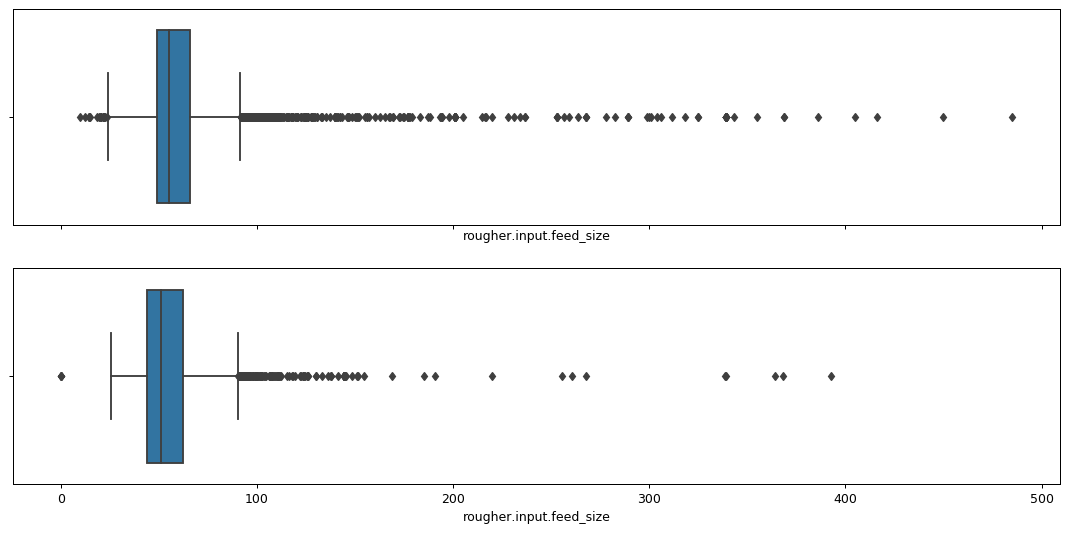

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [8]:
# rougher.input.feed_size размер гранул на подаче грубой очистки
# primary_cleaner.input.feed_size размер на подче первой очистки


display(data_test['rougher.input.feed_size'].describe())

display(data_train['rougher.input.feed_size'].describe())

fig, (ax_box_0, ax_box_1) = plt.subplots(2, sharex=True, figsize=(15, 7), dpi= 90)

sns.boxplot(data_train['rougher.input.feed_size'], ax=ax_box_0)
sns.boxplot(data_test['rougher.input.feed_size'], ax=ax_box_1)

plt.show()

display(data_test['rougher.input.feed_size'].describe(), 
      data_train['rougher.input.feed_size'].describe(), 
      #sep='\n'
      )

    Вывод: размер гранул отличается, в тестовой выборке они меньше, средние и медианы отличаются на 5, при максимальных зачениях 392(test) и 484(train)

### Исследуйте суммарную концентрацию всех веществ на разных стадиях

765372.3654042522

978416.9989783718

1151237.821485698

'После флотации cуммарная концентрация составила: 765372.37'

'После первого этапа очистки cуммарная концентрация составила: 978417.0'

'После второго этапа очистки cуммарная концентрация составила: 1151237.82'

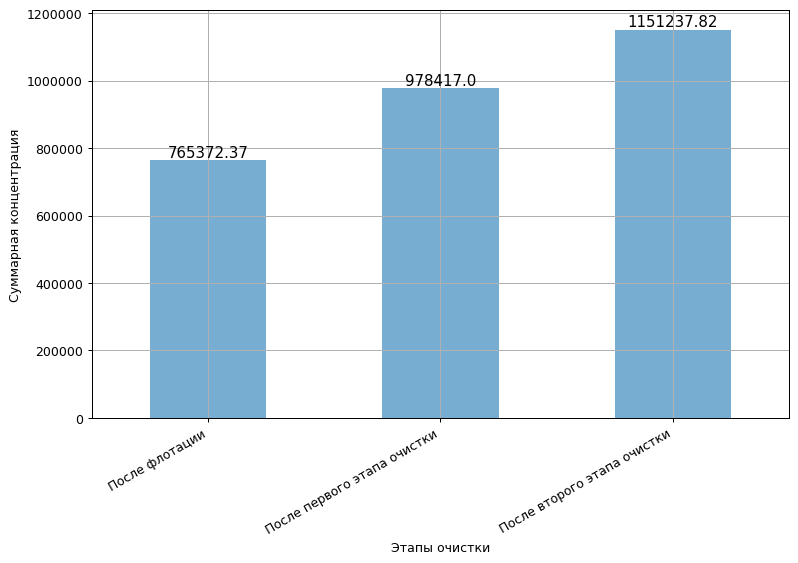

In [9]:
count = 0
out = '{} cуммарная концентрация составила: {}'

data_concentrate_sum = np.sum(data_concentrate) # для графиков
data_concentrate_sum_plot = []
for i in range(3):
    display(np.sum([data_concentrate_sum[count], 
                 data_concentrate_sum[count + 3], 
                 data_concentrate_sum[count + 6]]))
    count += 1                
count = 0
for i in levels:
    display(out.format(i, np.sum([data_concentrate_sum[count], 
                                     data_concentrate_sum[count + 3], 
                                     data_concentrate_sum[count + 6]]).round(2)))
    data_concentrate_sum_plot.append(np.sum([data_concentrate_sum[count], 
                                     data_concentrate_sum[count + 3], 
                                     data_concentrate_sum[count + 6]]))
    count += 1


data_concentrate_sum_plot = pd.Series(data_concentrate_sum_plot)


plt.figure(figsize=(10, 6), dpi = 90)
data_concentrate_sum_plot.plot(
    kind = 'bar',
    x = data_concentrate_sum_plot, 
    grid = True, 
    alpha = 0.6
    )
plt.ylabel('Суммарная концентрация')
plt.xlabel('Этапы очистки')     
for i, val in enumerate(data_concentrate_sum_plot.values.round(2)):
    plt.text(
        i, 
        val, 
        float(val), 
        horizontalalignment='center', 
        verticalalignment='bottom', 
        fontdict={'fontweight':500, 'size':12}
    )
plt.gca().set_xticklabels(levels, rotation=30, horizontalalignment = 'right')
plt.show()

In [10]:
data_all_concentrate = data_full.copy()

concentrate = []
for i in data_all_concentrate.columns:
    if 'concentrate' in i:        
        concentrate.append(i)
display(concentrate)

# Нашёл данные несущие информацию о концентрации веществ после каждой стадии

feed_input = []
for i in data_all_concentrate.columns:
    if 'input' in i:        
        feed_input.append(i)
display(feed_input)

# Нашёл данные несущие информацию о концентрации веществ вначале процесса очистки.

data_all_concentrate['sum_conc_final'] = data_all_concentrate[[
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
    'final.output.concentrate_au'
]].sum(axis=1)
    
data_all_concentrate['sum_primary_cleaner'] = data_all_concentrate[[
    'primary_cleaner.output.concentrate_ag',
    'primary_cleaner.output.concentrate_pb',
    'primary_cleaner.output.concentrate_sol',
    'primary_cleaner.output.concentrate_au'
]].sum(axis=1)

data_all_concentrate['sum_rougher'] = data_all_concentrate[[
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
    'rougher.output.concentrate_au'
]].sum(axis=1)

data_all_concentrate['sum_input'] = data_all_concentrate[[
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
    'rougher.input.feed_au'
]].sum(axis=1)

print(data_all_concentrate[['sum_conc_final', 'sum_primary_cleaner', 'sum_rougher','sum_input']].describe().loc[['min']])

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate']

     sum_conc_final  sum_primary_cleaner  sum_rougher  sum_input
min             0.0                  0.0          0.0       0.04


    В данных присутствуют нулевые значения. Эти означает, что в какой-то момент установка была пуста, и неизвестно шел ли процесс обработки, либо это ошибка измерений. 
    Удалим нулевые значения в данных сырья поступающего на очистку и в целевых признаках. Так же удалим пропуски в данных

In [11]:
data_train_good = data_train.copy()
data_test_good = data_test.copy()
data_train_good.replace(0, np.nan, inplace=True)
data_test_good.replace(0, np.nan, inplace=True)

data_train_good = data_train.dropna()
data_test_good = data_test.dropna()
data_train_good = data_train_good.reset_index(drop=True)
data_test_good = data_test_good.reset_index(drop=True)

## Модель

### Напишите функцию для вычисления итоговой sMAPE.

In [12]:
def total_smape(smape_rougher,smape_final):
    return 0.25*smape_rougher + 0.75*smape_final

### Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке.

In [13]:
data_train_good.shape

(14149, 55)

In [14]:
data_test_good.shape

(5290, 55)

In [15]:
# Для обучающих и тестовых данных извлек признаки и целевой признак.
# Целевой признак -'rougher.output.recovery' -

features_train_rougher = data_train_good.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1)
target_train_rougher = data_train_good['rougher.output.recovery'] 
features_test_rougher = data_test_good.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1) 
target_test_rougher = data_test_good['rougher.output.recovery']

# Целевой признак -'final.output.recovery'-

features_train_final = data_train_good.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1)
target_train_final = data_train_good['final.output.recovery'] 
features_test_final = data_test_good.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1)
target_test_final = data_test_good['final.output.recovery']

In [16]:
# Создал объект структуры StandardScaler() и настроил его на обучающих данных и смасштабировал численные признаки.

def scale(features_train, features_test):
    scaler = StandardScaler()
    cols_train = features_train.columns
    cols_test = features_test.columns
    scaler.fit(features_train[cols_train])
    features_train[cols_train] = scaler.transform(features_train[cols_train])
    features_test[cols_test] = scaler.transform(features_test[cols_test])
    pd.options.mode.chained_assignment = None
    
    return features_train, features_test

features_train_rougher, features_test_rougher = scale(features_train_rougher, features_test_rougher)
features_train_final, features_test_final = scale(features_train_final, features_test_final)

In [17]:
# Написал функцию для обучения модели и проверки качества кросс-валидацией, а так же нахождние итоговой sMAPE.

def smape(target,predictions):
    numerator = abs(predictions - target)
    divider = (abs(target) + abs(predictions)) / 2
    summa = (numerator / divider).sum()
    smape = (1 / len(target)) * summa * 100
    return smape

def ml(model):  
    model.fit(features_train_rougher, target_train_rougher)
    predicted_train_rougher = model.predict(features_train_rougher)
    smape_rougher = (cross_val_score(
        model, 
        features_train_rougher, 
        target_train_rougher, 
        cv = 5, 
        scoring = make_scorer(
            smape, 
            greater_is_better = False
        )
    ).mean())
    
    model.fit(features_train_final, target_train_final)
    predicted_train_final = model.predict(features_train_final)        
    smape_final = (cross_val_score(
        model, 
        features_train_final, 
        target_train_final, 
        cv = 5, 
        scoring = make_scorer(
            smape, 
            greater_is_better = False
        )
    ).mean())
    
    tot_smape = total_smape(smape_rougher,smape_final)     
    
    return tot_smape, smape_rougher, smape_final

In [18]:
model = LinearRegression()
tot_smape, smape_rougher, smape_final = ml(model)
print('Средняя оценка качества модели линейной регрессии после флотации: {}'.format(-smape_rougher))
print('Средняя оценка качества модели линейной регрессии после финальной обработки: {}'.format(-smape_final))
print('sMAPE_FINAL: {}'.format(-tot_smape))

Средняя оценка качества модели линейной регрессии после флотации: 12.802483458481984
Средняя оценка качества модели линейной регрессии после финальной обработки: 12.245300320302253
sMAPE_FINAL: 12.384596104847187


In [19]:
best_tot_smape = 1000
best_model_dt = None
best_smape_rougher = 1000
best_smape_final = 1000
for depth in range(2,10):
    model_dt = DecisionTreeRegressor(max_depth = depth, random_state = 12345)
    tot_smape, smape_rougher, smape_final = ml(model_dt)
    if abs(tot_smape) < abs(best_tot_smape):
        best_model_dt = model_dt
        best_tot_smape = tot_smape
        best_smape_rougher = smape_rougher
        best_smape_final = smape_final


print('Средняя оценка качества модели дерева принятия решений после флотации: {}'.format(-smape_rougher))
print('Средняя оценка качества модели дерева принятия решений после финальной обработки: {}'.format(-smape_final))
print('sMAPE_FINAL: {}'.format(-tot_smape))

Средняя оценка качества модели дерева принятия решений после флотации: 13.673702299705525
Средняя оценка качества модели дерева принятия решений после финальной обработки: 15.17426369060954
sMAPE_FINAL: 14.799123342883536


In [20]:
best_tot_smape = 1000
best_model_rf = None
best_smape_rougher = 1000
best_smape_final = 1000
for est in range(2,10,3):
    for depth in range(2,10,3):
        model_rf = RandomForestRegressor(n_estimators = est,max_depth = depth)
        tot_smape, smape_rougher, smape_final = ml(model_rf)
        if abs(tot_smape) < abs(best_tot_smape):
            best_model_rf = model_rf
            best_tot_smape = tot_smape
            best_smape_rougher = smape_rougher
            best_smape_final = smape_final

print('Средняя оценка качества модели случайного леса после флотации: {}'.format(-smape_rougher))
print('Средняя оценка качества модели случайного леса после финальной обработки: {}'.format(-smape_final))
print('sMAPE_FINAL: {}'.format(-tot_smape))

Средняя оценка качества модели случайного леса после флотации: 12.678960384698179
Средняя оценка качества модели случайного леса после финальной обработки: 11.931426325750104
sMAPE_FINAL: 12.118309840487123


In [21]:
model = DummyRegressor()
tot_smape, smape_rougher, smape_final = ml(model)
print('Средняя оценка качества модели дамми-регрессии после флотации: {}'.format(-smape_rougher))
print('Средняя оценка качества модели дамми-регрессии после финальной обработки: {}'.format(-smape_final))
print('sMAPE_FINAL: {}'.format(-tot_smape))

Средняя оценка качества модели дамми-регрессии после флотации: 12.215336413217326
Средняя оценка качества модели дамми-регрессии после финальной обработки: 11.361359303211872
sMAPE_FINAL: 11.574853580713235


    Модель DecisionTreeRegressor, со значением метрики smape 11.02, показала лучший результат, что лучше чем значение smape константной модели 11.57
    Проверим лучшую модель на тестовой выборке

In [22]:
best_model_dt.fit(features_train_rougher, target_train_rougher)
smape_rougher = (cross_val_score(best_model_dt,features_test_rougher,target_test_rougher, cv = 5, 
                                 scoring = make_scorer(smape, greater_is_better = False)).mean())
smape_final = (cross_val_score(best_model_dt,features_test_final,target_test_final, cv = 5, 
                                 scoring = make_scorer(smape, greater_is_better = False)).mean())
tot_smape = total_smape(smape_rougher,smape_final)
print('Средняя оценка качества модели после флотации: {}'.format(-smape_rougher))
print('Средняя оценка качества модели после финальной обработки: {}'.format(-smape_final))
print('sMAPE_FINAL: {}'.format(-tot_smape))

Средняя оценка качества модели после флотации: 10.338348782952567
Средняя оценка качества модели после финальной обработки: 9.935841920506107
sMAPE_FINAL: 10.036468636117721


## Вывод

    В ходе исследования я, проверил наличие пропусков, дубликатов. 
    В тестовых данных недоступны параметры готового продукта, т.к. эти параметры я получаил по окончании процесса очистки.
    Обнаружил, что концентрация золота увеличивается с каждым этапом, а концентрация серебра снижается после флотации.
    Распределение размеров гранул в train и test выборках примерно одинаковое.
    В данных наблюдается множество нулевых значений и пропусков.
    
Наилучшая модель - DecisionTreeRegressor дала значение метрики smape 10.03 на тестовой выборке.